In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('World.csv')
df.head(5)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [3]:
feature_names=list(df.columns)

In [4]:
feature_names

['CountryName',
 'CountryCode',
 'Year',
 'Total Population',
 'Urban population (% of total)']

In [5]:
row_vals=df.iloc[0].values.tolist()

In [7]:
row_vals

['Arab World', 'ARB', 1960, 92495902.0, 31.285384211605397]

In [8]:
# Zip lists: zipped_lists
zipped_lists = zip(feature_names,row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)


{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'Year': 1960, 'Total Population': 92495902.0, 'Urban population (% of total)': 31.285384211605397}


In [9]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names,row_vals)

# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'Year': 1960, 'Total Population': 92495902.0, 'Urban population (% of total)': 31.285384211605397}


In [15]:
pd.DataFrame(rs_fxn,index=[0])

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,92495902.0,31.285384


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CountryName                    13374 non-null  object 
 1   CountryCode                    13374 non-null  object 
 2   Year                           13374 non-null  int64  
 3   Total Population               13374 non-null  float64
 4   Urban population (% of total)  13374 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


In [17]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data

In [18]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('World.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

{'CountryName': 1, 'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Sa

In [23]:
# Initialize reader object: df_reader
df_reader = pd.read_csv('World.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

In [24]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('World.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


<ipython-input-34-5008e95fbf27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] / 100) for tup in pops_list]


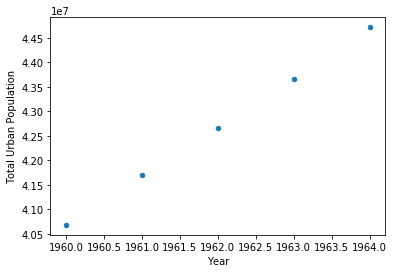

In [34]:
# Code from previous exercise
urb_pop_reader = pd.read_csv('World.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] / 100) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind= 'scatter', x='Year', y='Total Urban Population')
plt.show()

<ipython-input-35-46b18198e38b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


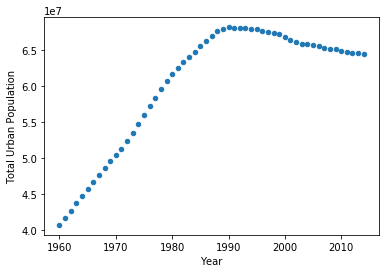

In [35]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('World.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

In [36]:
data

,CountryName,CountryCode,Year,Total Population,Urban population (% of total),Total Urban Population
2,Central Europe and the Baltics,CEB,1960,91401583.0,44.507921,40680944
244,Central Europe and the Baltics,CEB,1961,92237118.0,45.206665,41697325
486,Central Europe and the Baltics,CEB,1962,93014890.0,45.866565,42662734
728,Central Europe and the Baltics,CEB,1963,93845749.0,46.534093,43670267
970,Central Europe and the Baltics,CEB,1964,94722599.0,47.208743,44717348
1212,Central Europe and the Baltics,CEB,1965,95447065.0,47.880308,45700349
1454,Central Europe and the Baltics,CEB,1966,96148635.0,48.505097,46636988
1696,Central Europe and the Baltics,CEB,1967,97043587.0,49.067767,47617121
1938,Central Europe and the Baltics,CEB,1968,97882394.0,49.638696,48587544
2180,Central Europe and the Baltics,CEB,1969,98602140.0,50.215658,49513713
